### Offline data processing 

This script takes a local recording of Muse EEG data, converts it into an MNE raw object then processes and visualises the data. 

A logistic regression model is then trained on this dataset and a classification score calculated.

In [8]:
import os
from collections import OrderedDict
import warnings
warnings.filterwarnings('ignore')

from eegnb import generate_save_fn
from eegnb.devices.eeg import EEG
from eegnb.experiments.visual_n170 import n170
from eegnb.datasets import fetch_dataset
from eegnb.analysis.utils import load_data, plot_conditions

from mne.decoding import Vectorizer

import matplotlib, mne
import numpy as np
import pandas as pd
from mne import Epochs,find_events

In [9]:
experiment = 'visual_n170'
session = 2
subject = 2 

In [10]:
# n170_data_path = os.path.join('data','session001', 'recording_2022-12-16-17.23.35.csv')
n170_data_path = 'C:/Users/tazch/.eegnb/data/visual_n170/local/muse2016/subject0001/recording_2022-12-16-17.23.35.csv'

In [29]:
# Read data as a numpy array
data = pd.read_csv(n170_data_path)
data = data.set_index('timestamps')

In [30]:
# Transpose data so that it agrees with MNE 
data = data.transpose()

In [31]:
# Define channel types and names
ch_types = ['eeg', 'eeg', 'eeg', 'eeg', 'eeg']
ch_names = ['TP9', 'AF7', 'AF8', 'TP10', 'AUX']

# Define number of channels 
n_channels = 5
sampling_freq = 256

In [34]:
# Create MNE info

info = mne.create_info(ch_types=ch_types, ch_names =ch_names, sfreq=sampling_freq)

In [35]:
# Create a raw MNE object from the data and info above

raw = mne.io.RawArray(data, info)

Creating RawArray with float64 data, n_channels=5, n_times=30828
    Range : 0 ... 30827 =      0.000 ...   120.418 secs
Ready.


Effective window size : 8.000 (s)


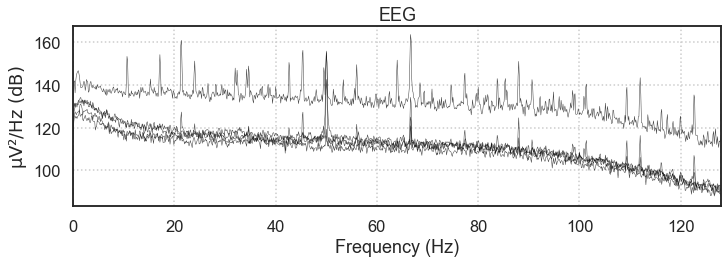

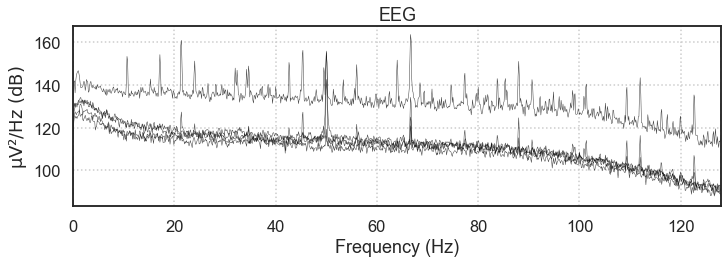

In [36]:
# Plot PSD for some reason
raw.plot_psd()

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 20 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 20.00 Hz: -6.02, -6.02 dB

Effective window size : 8.000 (s)


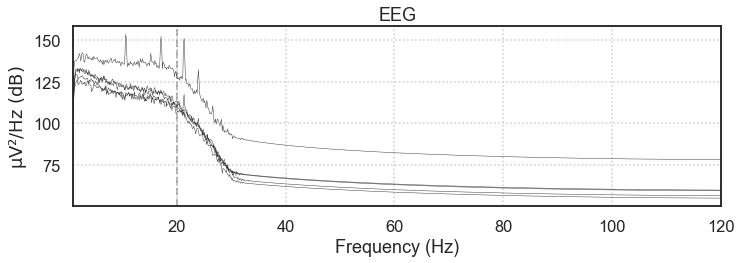

In [57]:
# Apply bandpass filter and plot again 
raw.filter(1,20, method='iir')
raw.plot_psd(fmin=1, fmax=120);

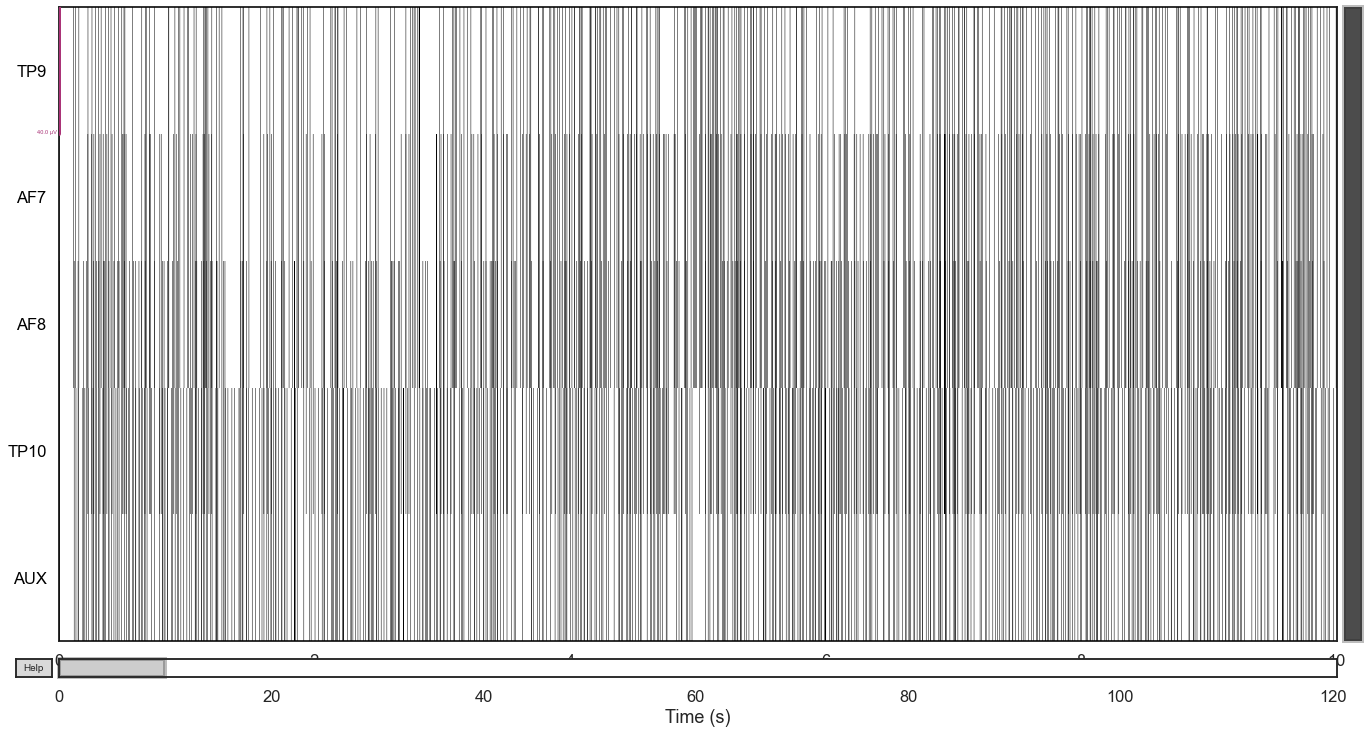

In [56]:
# Inline is not interactive, use matplotlib notebook for an interactive plot

raw.plot();

In [48]:
# Create an array containing the timestamps and type of each stimulus (i.e. face or house)
events = find_events(raw)
event_id = {'House': 1, 'Face': 2}

# Create an MNE Epochs object representing all the epochs around stimulus presentation
epochs = Epochs(raw, events=events, event_id=event_id,
                tmin=-0.1, tmax=0.8, baseline=None,
                reject={'eeg': 75e-6}, preload=True,
                verbose=False, picks=[0,1,2,3])
print('sample drop %: ', (1 - len(epochs.events)/len(events)) * 100)
epochs.plot_image(picks=['TP9'])

ValueError: No stim channels found. Consider specifying them manually using the 'stim_channel' parameter.